<a href="https://colab.research.google.com/github/bamboohorseking/INDE577/blob/main/MLP_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multilayer Perceptron
### Definition: 
A multilayer perceptron (MLP) is a feedforward artificial neural network that generates a set of outputs from a set of inputs, which is characterized by several layers of input nodes connected as a directed graph between the input and output layers. It is a supervised learning method, and it usually can accurately make a prediction based on the trainset. However, it will require more computational cost than some of other machine learning methods.\
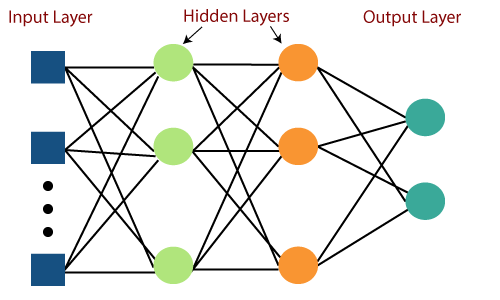

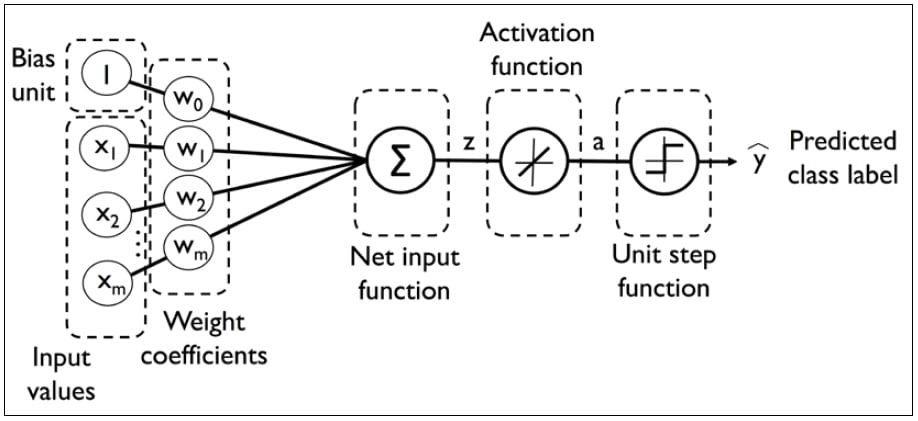

Two figures above clearly illustrate the basic algorithm of the Multilayer Perceptron. For our MLP model, we have several parts:


1.   Feed Froward: The formula for the Net input function: $z = w^T + b$, and the activation function is $a = \Phi(z)$, and $\Phi \in \{linear, sigmoid, sign\}$. If linear has been selected, then it can be used to do the prediction; if sigmoid has been selected, then it can be used to do the logistic regression; if sign has been selected, then it can be used to do the classification. 
2.   Compute Loss: Loss = $\frac{1}{2} \sum_{i=1}^{n}(a_i - y_i)^2$
3.   Stochastic Gradient Descent: This part is used to optimize the model performance by iteratively updating the weights asssigned on each input features. 

In my model, the activation function I choose is sigmoid function since for this dataset which is similar to mnist dataset, the sigmoid probably will perform the best.\
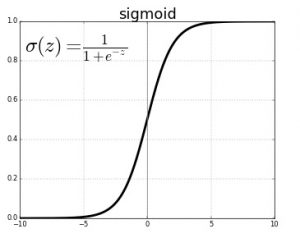\
When the activation function for a neuron is a sigmoid function it is a guarantee that the output of this unit will always be between 0 and 1. Also, as the sigmoid is a non-linear function, the output of this unit would be a non-linear function of the weighted sum of inputs.

The whole procedure for my project is: 


1.   Let $a_0 = X$  
2.   for $i = 1, \dots, l$, $z^l = w^l a^{l-1} + b^l$, $a^l = σ(z^l)$
3.   Finish with $a^l$ which is our output. 
4.   Loss function = c(w, b; X, y) = $\frac{1}{2} \sum_{i=1}^{n}(a_i - y_i)^2$.
5.   Calculate the partial derivatives of the loss function:\
\begin{align}
\frac{dc}{dw^l_{11}} &= \frac{d}{dw^l_{11}}\frac{1}{2} \sum_{i=1}^{n}(a_i - y_i)^2 \\ 
&= (a^l_1 - y_1)\frac{d}{dw^l_{11}}(a^l_1)\\
&= (a^l_1 - y_1)σ'(z^l_1)a^{l-1}_1\\ 
\frac{dc}{dw^l_{12}} &= (a^l_1 - y_1)σ'(z^l_1)a^{l-1}_2\\
\frac{dc}{dw^l_{21}} &= (a^l_2 - y_2)σ'(z^l_2)a^{l-1}_1\\
\frac{dc}{dw^l_{22}} &= (a^l_2 - y_2)σ'(z^l_2)a^{l-1}_2\\
\frac{dc}{db^l_1} &= (a^l_1 - y_1)σ'(z^l_1)\\
\frac{dc}{db^l_2} &= (a^l_2 - y_2)σ'(z^l_2)\\
\end{align}
The output form is: $\xi^l_j = (a_j^l - y_j)σ'(z_j^l)$
6. Then use gradient descent methdo to update the weight and intercept iteratively. 
\begin{align}
w^l &= w^{l-1} - \alpha* \frac{dc}{dw^l}\\ 
b^l &= b^{l-1} - \alpha* \frac{dc}{db^l}
\end{align}



For this project, I will implement the MLP method on the dataset of fashion mnist. This dataset is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. The access website link is: [access link](https://github.com/zalandoresearch/fashion-mnist)

Detials about this dataset:\
**Labels**:\
Each training and test example is assigned to one of the following labels:

| Index | Label |
| --- | --- |
0 |T-shirt/top
1 |Trouser
2 |Pullover
3 |Dress
4 |Coat
5 |Sandal
6 |Shirt
7 |Sneaker
8 |Bag
9 |Ankle boot

The following packages will be needed to run the code below:
*   matplotlib.pyplot: [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html)
*   numpy: [documentation](https://numpy.org/devdocs/)
*   pandas: [documentation](https://pandas.pydata.org/docs/)
*   sklearn: [documentation](https://scikit-learn.org/stable/)
*   tensorflow: [documentation](https://www.tensorflow.org/api_docs)

First, import the packages that we need to use

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow import keras

In [ ]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras.layers import Dropout

Import the fashion mnist data from tensorflow.keras.datasets.

In [ ]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

In [ ]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

Acquire the shape of X_train and y_train

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

Test on the first row of the training set, and see what label it has.

In [ ]:
y_train[0]

2

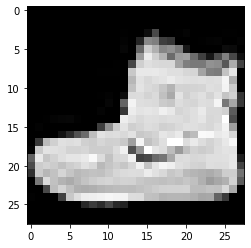

In [ ]:
plt.imshow(X_train[0], cmap = 'gray')

Normalize inputs from 0-255 to 0-1

In [ ]:
np.max(X_train)

255

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
X_test[0].shape

(28, 28)

Then, we will one hot encode outputs. 

In [ ]:
# X will temp store flattened matrices
X = []
for x in X_train:
  X.append(x.flatten().reshape(784, 1))

# Y will temp store one-hot encoded label vectors
Y = []
for y in y_train:
  temp_vec = np.zeros((10, 1))
  temp_vec[y][0] = 1.0
  Y.append(temp_vec)

# Our data will be stored as a list of tuples. 
train_data = [p for p in zip(X, Y)]

In [ ]:
p = train_data[0]
print(p[1])
print(y_train[0])

[[0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
2


In [ ]:
X = []
for x in X_test:
  X.append(x.flatten().reshape(784, 1))

Y = []
for y in y_test:
  temp_vec = np.zeros((10, 1))
  temp_vec[y][0] = 1.0
  Y.append(temp_vec)

test_data = [p for p in zip(X, Y)]

In the following part, I will define function of sigmoid, sigmoid_prime, MSE, initilaize_weights. And the relevant drivation of the function has already been shown in the very beginning of this project. 

In [ ]:
def sigmoid(z):
  return 1.0/(1.0+np.exp(-z))

def sigmoid_prime(z):
  return sigmoid(z)*(1.0-sigmoid(z))

def mse(a, y):
  return .5*sum((a[i]-y[i])**2 for i in range(10))[0]

In [ ]:
def initialize_weights(layers = [784, 60, 60, 10]):
  W = [[0.0]]
  B = [[0.0]]
  for i in range(1, len(layers)):
    w_temp = np.random.randn(layers[i], layers[i-1])*np.sqrt(2/layers[i-1])
    b_temp = np.random.randn(layers[i], 1)*np.sqrt(2/layers[i-1])

    W.append(w_temp)
    B.append(b_temp)
  return W, B

Use the initialization function to initialize weight and intercept. 

In [ ]:
W, B = initialize_weights()

In [ ]:
x, y = train_data[0]

Set $a_0$ as the original input data, $z_1$ as the linear combination of $a_0$ input. And then use $z_1$ to get $a_1$. $z_2$ is the linear combination of $a_1$. 

In [ ]:
a0 = x
z1 = (W[1] @ a0) + B[1]
a1 = sigmoid(z1)

In [ ]:
a1.shape

(60, 1)

In [ ]:
z2 = (W[2] @ a1) + B[2]
a2 = sigmoid(z2)
print(a2.shape)

(60, 1)


In [ ]:
z3 = (W[3] @ a2) + B[3]
a3 = sigmoid(z3)
print(a3.shape)

(10, 1)


Simple example to implement the feed forward procedure which has been described in the beginning of this project. 

In [ ]:
W, B = initialize_weights(layers=[784, 60, 60, 10])
x, y = train_data[0]
Z = [[0.0]]
A = [x]
L = len(B)
for i in range(1, L):
  z = (W[i] @ A[i-1]) + B[i]
  a = sigmoid(z)

  Z.append(z)
  A.append(a)


In [ ]:
A[-1].shape

(10, 1)

Build a dictionary to stores the delta values output for each layers.

In [ ]:
deltas = dict()
delta_last = (A[-1] - y)*sigmoid_prime(Z[-1])
deltas[L-1] = delta_last

In [ ]:
deltas[L-1]

array([[ 0.05843098],
       [ 0.14225369],
       [-0.14681735],
       [ 0.06303197],
       [ 0.11990864],
       [ 0.09981388],
       [ 0.07501196],
       [ 0.07095781],
       [ 0.09018776],
       [ 0.14789837]])

In [ ]:
for l in range(L-2, 0, -1):
  deltas[l] = (W[l+1].T @ deltas[l+1])*sigmoid_prime(Z[l])

In [ ]:
deltas[1].shape

(60, 1)

Set the learning rate $\alpha$

In [ ]:
alpha = 0.04

Gradient Descent method to update w and b. 

In [ ]:
for i in range(1, 4):
  W[i] = W[i] - alpha*deltas[i]@A[i-1].T
  B[i] = B[i] - alpha*deltas[i]

The following cell is defining the function of forward feed procedure and delta_dicts procedure. And we have already shown the examples above. 

In [ ]:
def forward_pass(W, B, p, predict_vector = False):
  Z =[[0.0]]
  A = [p[0]]
  L = len(W)
  for i in range(1, L):
    z = (W[i] @ A[i-1]) + B[i]
    a = sigmoid(z)

    Z.append(z)
    A.append(a)

  if predict_vector == True:
    return A[-1]
  else:
    return Z, A

def deltas_dict(W, B, p):
  Z, A = forward_pass(W, B, p)
  L = len(W)
  deltas = dict()
  deltas[L-1] = (A[-1] - p[1])*sigmoid_prime(Z[-1])
  for l in range(L-2, 0, -1):
    deltas[l] = (W[l+1].T @ deltas[l+1]) * sigmoid_prime(Z[l])

  return A, deltas

Deifne the MSE function

In [ ]:
def MSE(W, B, data):
  c = 0.0
  for p in data:
    a = forward_pass(W, B, p, predict_vector=True)
    c += mse(a, p[1])
  return c/len(data)

Initialize w and b, and use the initial w and b to make a prediction on a random subset of test set to see the model performance. 

In [ ]:
W, B = initialize_weights()
print(f"Initial Cost = {MSE(W, B, train_data)}")

Initial Cost = 1.6993484454424486


As we can see, the initial cost is 1.7 which is kind of large

Predicted Value = 3
Actual Value = 1


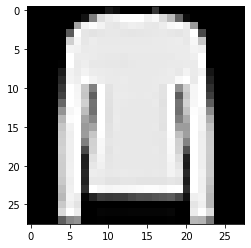

In [ ]:
i = np.random.randint(0, len(X_test))
prediction = np.argmax(forward_pass(W, B, test_data[i], predict_vector=True))
print(f"Predicted Value = {prediction}")
print(f"Actual Value = {y_test[i]}")
plt.imshow(X_test[i], cmap="gray")
plt.show()

So, we need to define the stochastic gradient descent function to find the optimal w and b, which will give us the 'lowest' MSE. 

In [ ]:
def stochastic_gradient_descent(W, B, data, alpha = 0.04, epochs = 3):
  L = len(W)
  print(f"Initial Cost = {MSE(W, B, data)}")
  for k in range(epochs):
    for p in data:
      A, deltas = deltas_dict(W, B, p)
      for i in range(1, L):
        W[i] = W[i] - alpha*deltas[i]@A[i-1].T
        B[i] = B[i] - alpha*deltas[i]
    print(f"{k} Cost = {MSE(W, B, data)}")

Now, we put all the function that we defined together inside the MultilayerPerceptron class.

In [ ]:
class MultilayerPerceptron():
  
  def __init__(self, layers = [784, 60, 60, 10]):
    self.layers = layers
    self.L = len(self.layers)
    self.W =[[0.0]]
    self.B = [[0.0]]
    for i in range(1, self.L):
      w_temp = np.random.randn(self.layers[i], self.layers[i-1])*np.sqrt(2/self.layers[i-1])
      b_temp = np.random.randn(self.layers[i], 1)*np.sqrt(2/self.layers[i-1])

      self.W.append(w_temp)
      self.B.append(b_temp)

  def reset_weights(self, layers = [784, 60, 60, 10]):
    self.layers = layers
    self.L = len(self.layers)
    self.W = [[0.0]]
    self.B = [[0.0]]
    for i in range(1, self.L):
      w_temp = np.random.randn(self.layers[i], self.layers[i-1])*np.sqrt(2/self.layers[i-1])
      b_temp = np.random.randn(self.layers[i], 1)*np.sqrt(2/self.layers[i-1])

      self.W.append(w_temp)
      self.B.append(b_temp)


  def forward_pass(self, p, predict_vector = False):
    Z =[[0.0]]
    A = [p[0]]
    for i in range(1, self.L):
      z = (self.W[i] @ A[i-1]) + self.B[i]
      a = sigmoid(z)
      Z.append(z)
      A.append(a)

    if predict_vector == True:
      return A[-1]
    else:
      return Z, A

  def MSE(self, data):
    c = 0.0
    for p in data:
      a = self.forward_pass(p, predict_vector=True)
      c += mse(a, p[1])
    return c/len(data)

  def deltas_dict(self, p):
    Z, A = self.forward_pass(p)
    deltas = dict()
    deltas[self.L-1] = (A[-1] - p[1])*sigmoid_prime(Z[-1])
    for l in range(self.L-2, 0, -1):
      deltas[l] = (self.W[l+1].T @ deltas[l+1]) * sigmoid_prime(Z[l])

    return A, deltas

  def stochastic_gradient_descent(self, data, alpha = 0.04, epochs = 3):
    print(f"Initial Cost = {self.MSE(data)}")
    for k in range(epochs):
      for p in data:
        A, deltas = self.deltas_dict(p)
        for i in range(1, self.L):
          self.W[i] = self.W[i] - alpha*deltas[i]@A[i-1].T
          self.B[i] = self.B[i] - alpha*deltas[i]
    print(f"{k} Cost = {self.MSE(data)}")
    
    def mini_batch_gradient_descent(self, data, batch_size = 15, alpha = 0.04, epochs = 3):
        print(f"Initial Cost = {self.MSE(data)}")
        data_length = len(data)
        for k in range(epochs):
            for j in range(0, data_length-batch_size, batch_size):
                delta_list = []
                A_list = []
                for p in data[j:j+batch_size]:
                    A, deltas = self.deltas_dict(p)
                    delta_list.append(deltas)
                    A_list.append(A)
                
                for i in range(1, self.L):
                  self.W[i] = self.W[i] - (alpha/batch_size)*sum(da[0][i]@da[i][i-1].T for da in zip(delta_list, A_list))
                  self.B[i] = self.B[i] - (alpha/batch_size)*sum(deltas[i] for deltas in delta_list)
        print(f"{k} Cost = {self.MSE(data)}") 

In [ ]:
net = MultilayerPerceptron(layers=[784, 100, 100, 10])

In [ ]:
net.stochastic_gradient_descent(train_data)

Initial Cost = 1.4104952684357255
2 Cost = 0.45040586925281145


From the result above, we can see that after the stochastic gradient descent method, The MSE of our model has been decreased from 1.41 to 0.45

For my model above, I code the MLP from scratch. However, I am wondering if the learning rate will influence the MSE of our model. So I am going to test different learning rate to see the output. 

First, we will try the $\alpha$ = 0.1

In [ ]:
class MultilayerPerceptron1():
  
  def __init__(self, layers = [784, 60, 60, 10]):
    self.layers = layers
    self.L = len(self.layers)
    self.W =[[0.0]]
    self.B = [[0.0]]
    for i in range(1, self.L):
      w_temp = np.random.randn(self.layers[i], self.layers[i-1])*np.sqrt(2/self.layers[i-1])
      b_temp = np.random.randn(self.layers[i], 1)*np.sqrt(2/self.layers[i-1])

      self.W.append(w_temp)
      self.B.append(b_temp)

  def reset_weights(self, layers = [784, 60, 60, 10]):
    self.layers = layers
    self.L = len(self.layers)
    self.W = [[0.0]]
    self.B = [[0.0]]
    for i in range(1, self.L):
      w_temp = np.random.randn(self.layers[i], self.layers[i-1])*np.sqrt(2/self.layers[i-1])
      b_temp = np.random.randn(self.layers[i], 1)*np.sqrt(2/self.layers[i-1])

      self.W.append(w_temp)
      self.B.append(b_temp)


  def forward_pass(self, p, predict_vector = False):
    Z =[[0.0]]
    A = [p[0]]
    for i in range(1, self.L):
      z = (self.W[i] @ A[i-1]) + self.B[i]
      a = sigmoid(z)
      Z.append(z)
      A.append(a)

    if predict_vector == True:
      return A[-1]
    else:
      return Z, A

  def MSE(self, data):
    c = 0.0
    for p in data:
      a = self.forward_pass(p, predict_vector=True)
      c += mse(a, p[1])
    return c/len(data)

  def deltas_dict(self, p):
    Z, A = self.forward_pass(p)
    deltas = dict()
    deltas[self.L-1] = (A[-1] - p[1])*sigmoid_prime(Z[-1])
    for l in range(self.L-2, 0, -1):
      deltas[l] = (self.W[l+1].T @ deltas[l+1]) * sigmoid_prime(Z[l])

    return A, deltas

  def stochastic_gradient_descent(self, data, alpha = 0.1, epochs = 3):
    print(f"Initial Cost = {self.MSE(data)}")
    for k in range(epochs):
      for p in data:
        A, deltas = self.deltas_dict(p)
        for i in range(1, self.L):
          self.W[i] = self.W[i] - alpha*deltas[i]@A[i-1].T
          self.B[i] = self.B[i] - alpha*deltas[i]
    print(f"{k} Cost = {self.MSE(data)}")
    
    def mini_batch_gradient_descent(self, data, batch_size = 15, alpha = 0.1, epochs = 3):
        print(f"Initial Cost = {self.MSE(data)}")
        data_length = len(data)
        for k in range(epochs):
            for j in range(0, data_length-batch_size, batch_size):
                delta_list = []
                A_list = []
                for p in data[j:j+batch_size]:
                    A, deltas = self.deltas_dict(p)
                    delta_list.append(deltas)
                    A_list.append(A)
                
                for i in range(1, self.L):
                  self.W[i] = self.W[i] - (alpha/batch_size)*sum(da[0][i]@da[i][i-1].T for da in zip(delta_list, A_list))
                  self.B[i] = self.B[i] - (alpha/batch_size)*sum(deltas[i] for deltas in delta_list)
        print(f"{k} Cost = {self.MSE(data)}") 

In [ ]:
net1 = MultilayerPerceptron1(layers=[784, 100, 100, 10])
net1.stochastic_gradient_descent(train_data)

Initial Cost = 1.492094752434382
2 Cost = 0.4502645199365377


Then we will try $\alpha = 0.01$

In [ ]:
class MultilayerPerceptron2():
  
  def __init__(self, layers = [784, 60, 60, 10]):
    self.layers = layers
    self.L = len(self.layers)
    self.W =[[0.0]]
    self.B = [[0.0]]
    for i in range(1, self.L):
      w_temp = np.random.randn(self.layers[i], self.layers[i-1])*np.sqrt(2/self.layers[i-1])
      b_temp = np.random.randn(self.layers[i], 1)*np.sqrt(2/self.layers[i-1])

      self.W.append(w_temp)
      self.B.append(b_temp)

  def reset_weights(self, layers = [784, 60, 60, 10]):
    self.layers = layers
    self.L = len(self.layers)
    self.W = [[0.0]]
    self.B = [[0.0]]
    for i in range(1, self.L):
      w_temp = np.random.randn(self.layers[i], self.layers[i-1])*np.sqrt(2/self.layers[i-1])
      b_temp = np.random.randn(self.layers[i], 1)*np.sqrt(2/self.layers[i-1])

      self.W.append(w_temp)
      self.B.append(b_temp)


  def forward_pass(self, p, predict_vector = False):
    Z =[[0.0]]
    A = [p[0]]
    for i in range(1, self.L):
      z = (self.W[i] @ A[i-1]) + self.B[i]
      a = sigmoid(z)
      Z.append(z)
      A.append(a)

    if predict_vector == True:
      return A[-1]
    else:
      return Z, A

  def MSE(self, data):
    c = 0.0
    for p in data:
      a = self.forward_pass(p, predict_vector=True)
      c += mse(a, p[1])
    return c/len(data)

  def deltas_dict(self, p):
    Z, A = self.forward_pass(p)
    deltas = dict()
    deltas[self.L-1] = (A[-1] - p[1])*sigmoid_prime(Z[-1])
    for l in range(self.L-2, 0, -1):
      deltas[l] = (self.W[l+1].T @ deltas[l+1]) * sigmoid_prime(Z[l])

    return A, deltas

  def stochastic_gradient_descent(self, data, alpha = 0.01, epochs = 3):
    print(f"Initial Cost = {self.MSE(data)}")
    for k in range(epochs):
      for p in data:
        A, deltas = self.deltas_dict(p)
        for i in range(1, self.L):
          self.W[i] = self.W[i] - alpha*deltas[i]@A[i-1].T
          self.B[i] = self.B[i] - alpha*deltas[i]
    print(f"{k} Cost = {self.MSE(data)}")
    
    def mini_batch_gradient_descent(self, data, batch_size = 15, alpha = 0.01, epochs = 3):
        print(f"Initial Cost = {self.MSE(data)}")
        data_length = len(data)
        for k in range(epochs):
            for j in range(0, data_length-batch_size, batch_size):
                delta_list = []
                A_list = []
                for p in data[j:j+batch_size]:
                    A, deltas = self.deltas_dict(p)
                    delta_list.append(deltas)
                    A_list.append(A)
                
                for i in range(1, self.L):
                  self.W[i] = self.W[i] - (alpha/batch_size)*sum(da[0][i]@da[i][i-1].T for da in zip(delta_list, A_list))
                  self.B[i] = self.B[i] - (alpha/batch_size)*sum(deltas[i] for deltas in delta_list)
        print(f"{k} Cost = {self.MSE(data)}")

In [ ]:
net2 = MultilayerPerceptron2(layers=[784, 100, 100, 10])
net2.stochastic_gradient_descent(train_data)

Initial Cost = 1.2099614763013842
2 Cost = 0.4504280787606868


According to the practice before, we can conclude that the learning rate have no influence on the model performance. 